Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Memuat Dataset**

In [ ]:
#Type your code here
df = pd.read_csv('/content/drive/MyDrive/obesity/obesity_data.csv')
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


# **Exploratory Data Analysis (EDA)**

### Exploratory Data Analysis - Deskripsi Variabel


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [ ]:
print(f'Jumlah baris dan kolom: {df.shape}')

Jumlah baris dan kolom: (1000, 7)


In [ ]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [ ]:
df['ObesityCategory'].value_counts()

,count
ObesityCategory,
Normal weight,371
Overweight,295
Obese,191
Underweight,143


In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
PhysicalActivityLevel,0
ObesityCategory,0


In [ ]:
print(f' Jumlah duplikasi data: {df.duplicated().sum()}')

 Jumlah duplikasi data: 0


#### Visualisasi boxplot

<Axes: xlabel='Height'>

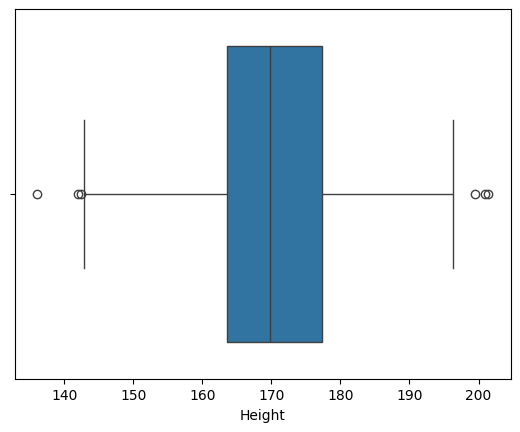

In [ ]:
sns.boxplot(x=df['Height'])

<Axes: xlabel='Age'>

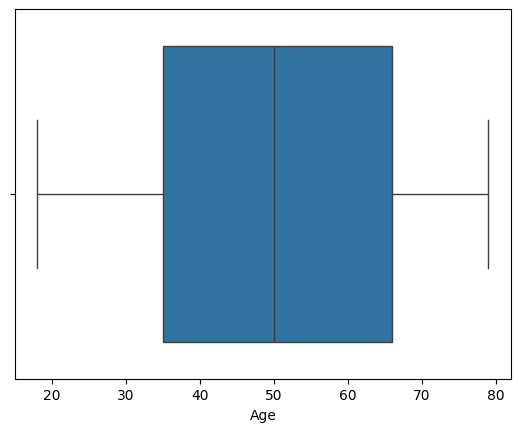

In [ ]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='Weight'>

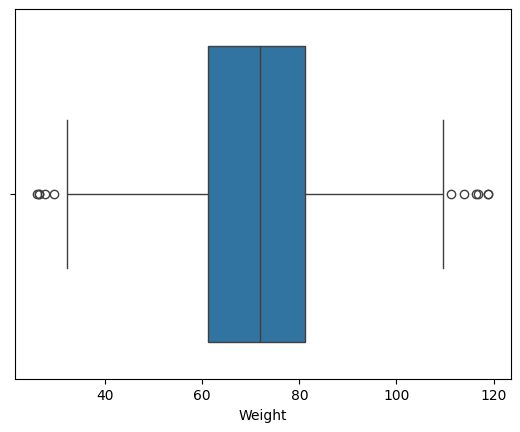

In [ ]:
sns.boxplot(x=df['Weight'])

<Axes: xlabel='BMI'>

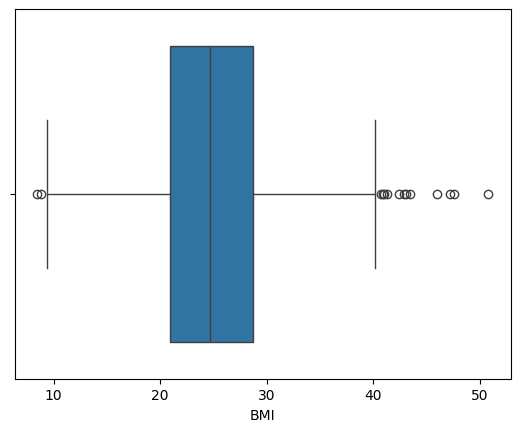

In [ ]:
sns.boxplot(x=df['BMI'])

<Axes: xlabel='PhysicalActivityLevel'>

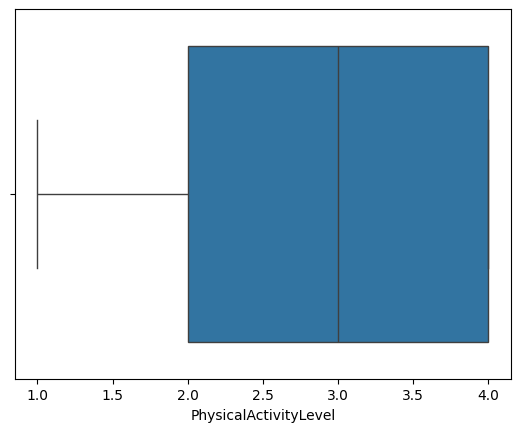

In [ ]:
sns.boxplot(x=df['PhysicalActivityLevel'])

**Insight:** Bedasarkan visualisasi Boxplot di atas terdapat outlier pada kolom *Height, Weight,* dan kolom *BMI*

#### Menangani outliers

In [ ]:
# Salin dataframe supaya data asli tetap aman
df_clean = df.copy()

# Loop untuk tiap fitur
for feature in df.select_dtypes(include='number'):
    Q1 = df_clean[feature].quantile(0.25)
    Q3 = df_clean[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data yang berada dalam batas normal
    df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]

print(f"Jumlah data setelah hapus outlier: {df_clean.shape[0]}")

Jumlah data setelah hapus outlier: 972


#### Univariate Analysis

In [ ]:
numerical_features = df_clean.select_dtypes(include='number').columns
categorical_features = df_clean.select_dtypes(include='object').columns

print("Numerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
Index(['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel'], dtype='object')

Categorical Features:
Index(['Gender', 'ObesityCategory'], dtype='object')


        jumlah sampel  persentase
Gender                           
Male              507        52.2
Female            465        47.8


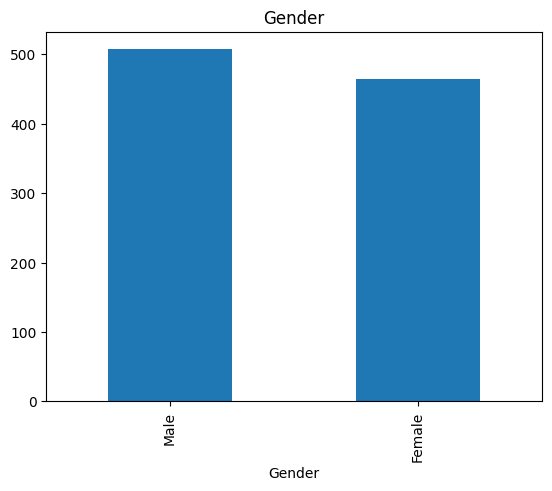

In [ ]:
feature = categorical_features[0]
count = df_clean[feature].value_counts()
percent = 100*df_clean[feature].value_counts(normalize=True)
df_sampel = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_sampel)
count.plot(kind='bar', title=feature);

**Insight:** Bedasarn distribusi di atas kategori *Male* memiliki jumlah terbanyak dengan presentase 52.2% sedangkan *Female* memiliki presentase 47.8%

                 jumlah sampel  persentase
ObesityCategory                           
Normal weight              371        38.2
Overweight                 293        30.1
Obese                      174        17.9
Underweight                134        13.8


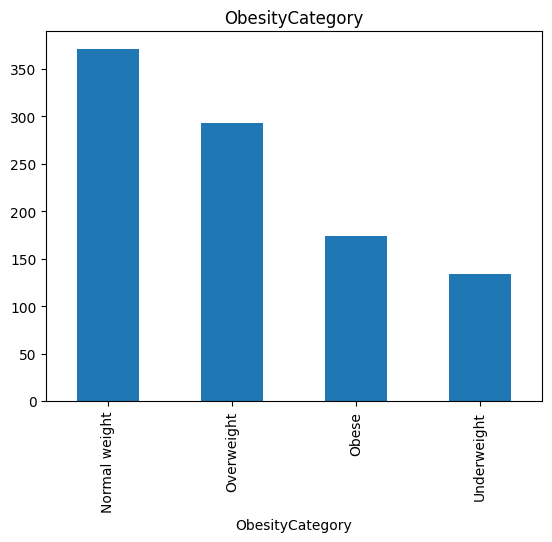

In [ ]:
feature = categorical_features[1]
count = df_clean[feature].value_counts()
percent = 100*df_clean[feature].value_counts(normalize=True)
df_sampel = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_sampel)
count.plot(kind='bar', title=feature);

**Insight:** Dapat disimpulkan bahwa bedasarkan barplot di atas *Normal weight* yang terbanyak dibandingkan kategori obesitas yg lain

#### visualisasi Numerical Features

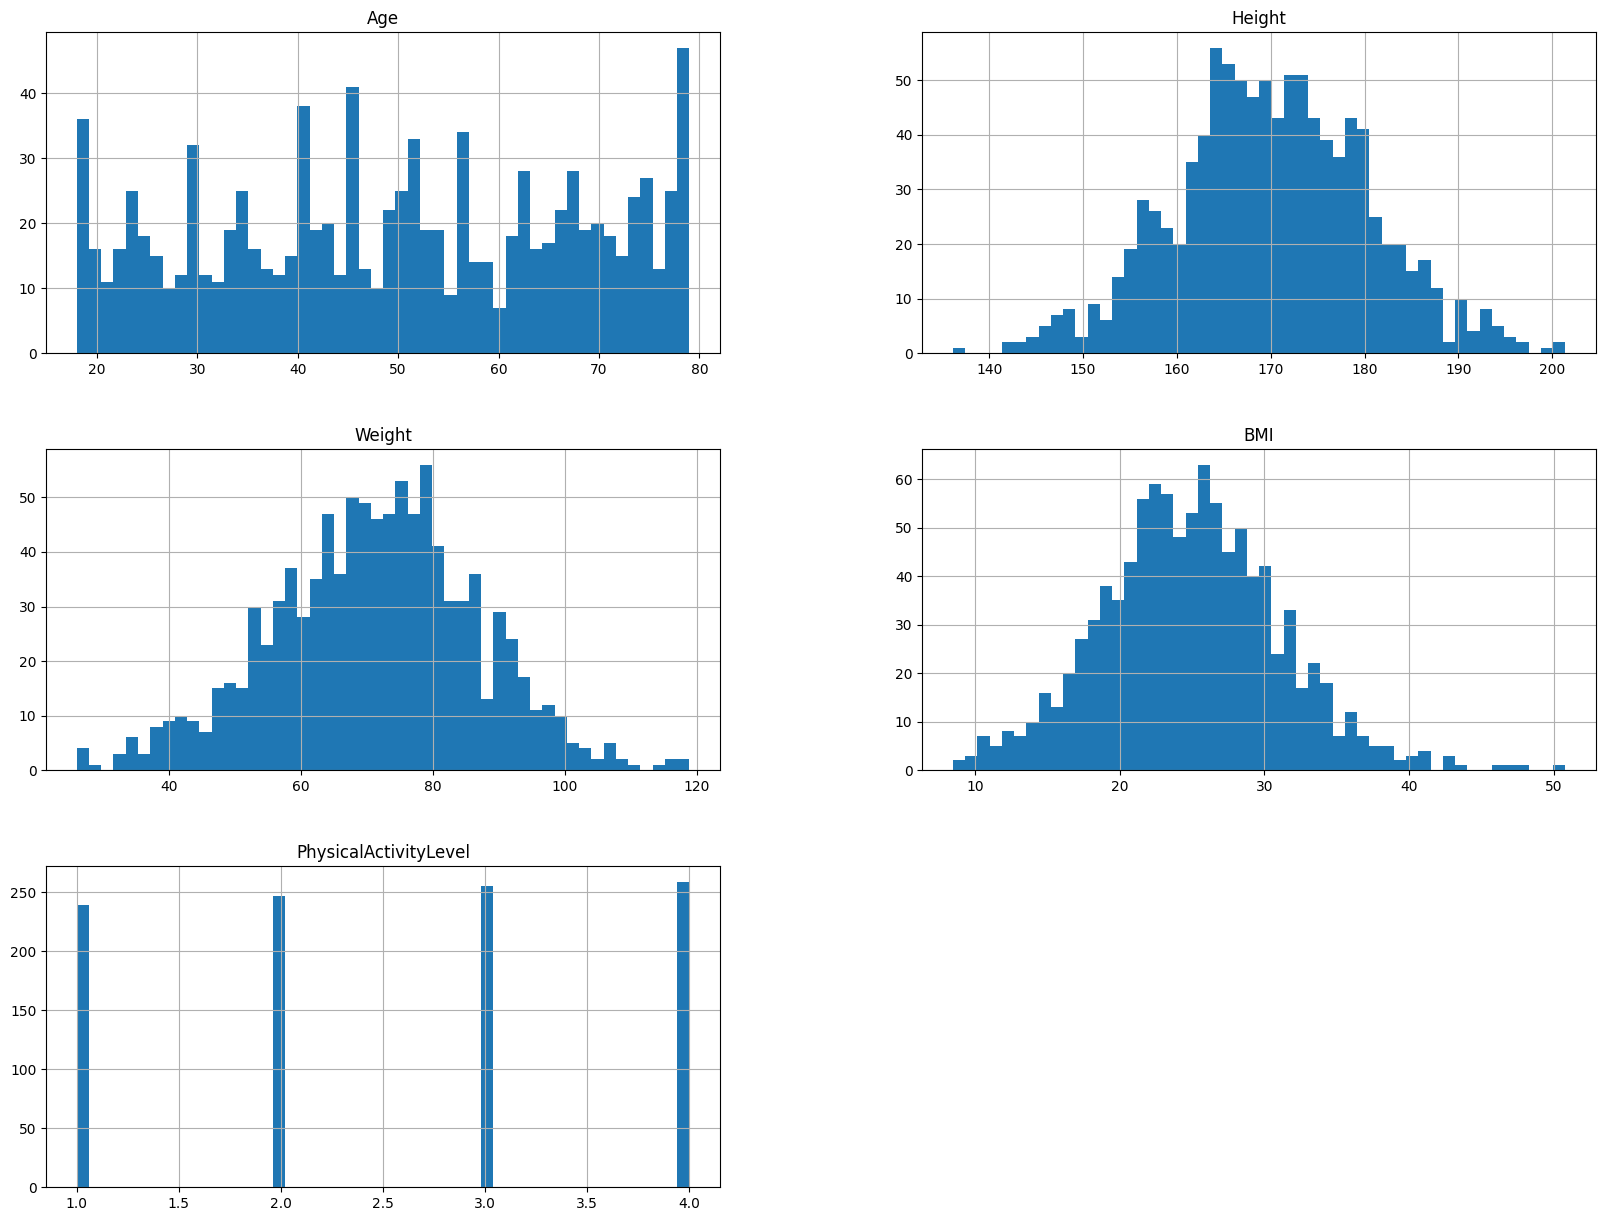

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

**Insight:** Data Height, Weight, dan BMI menunjukkan distribusi yang sehat untuk analisis prediktif/statistik.

### Exploratory Data Analysis - Multivariate Analysis

#### Categorical Features

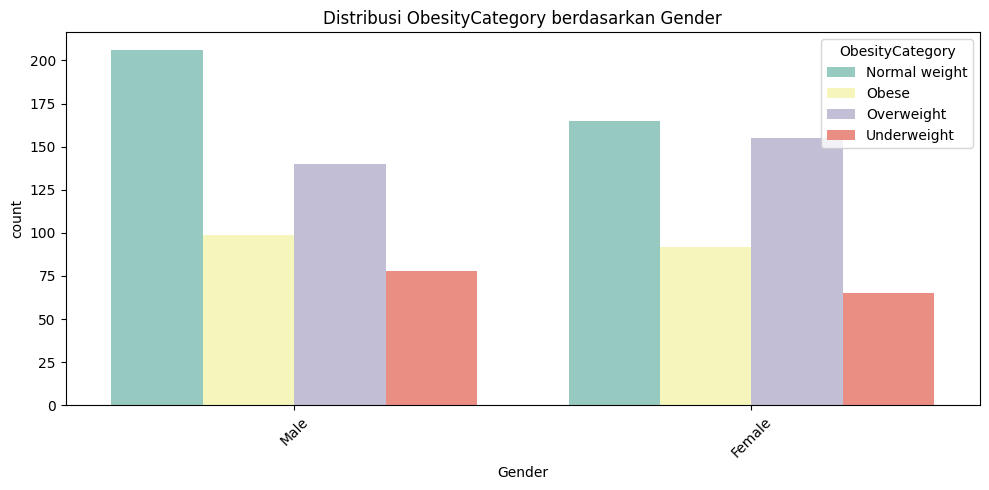

In [ ]:
cat_features = df.select_dtypes(include='object').columns.to_list()
cat_features.remove("ObesityCategory")

for col in cat_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue="ObesityCategory", palette="Set3")
    plt.title(f"Distribusi ObesityCategory berdasarkan {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Insight:** Dari distibusi Gender di atas dapat dilihat bahwa *Male* cenderung lebih memiliki lebih banyak *Normalweight* dibanding *Female* dan *Female* lebih banyak memiliki kategori *Overweight* dibandingkan *Male*

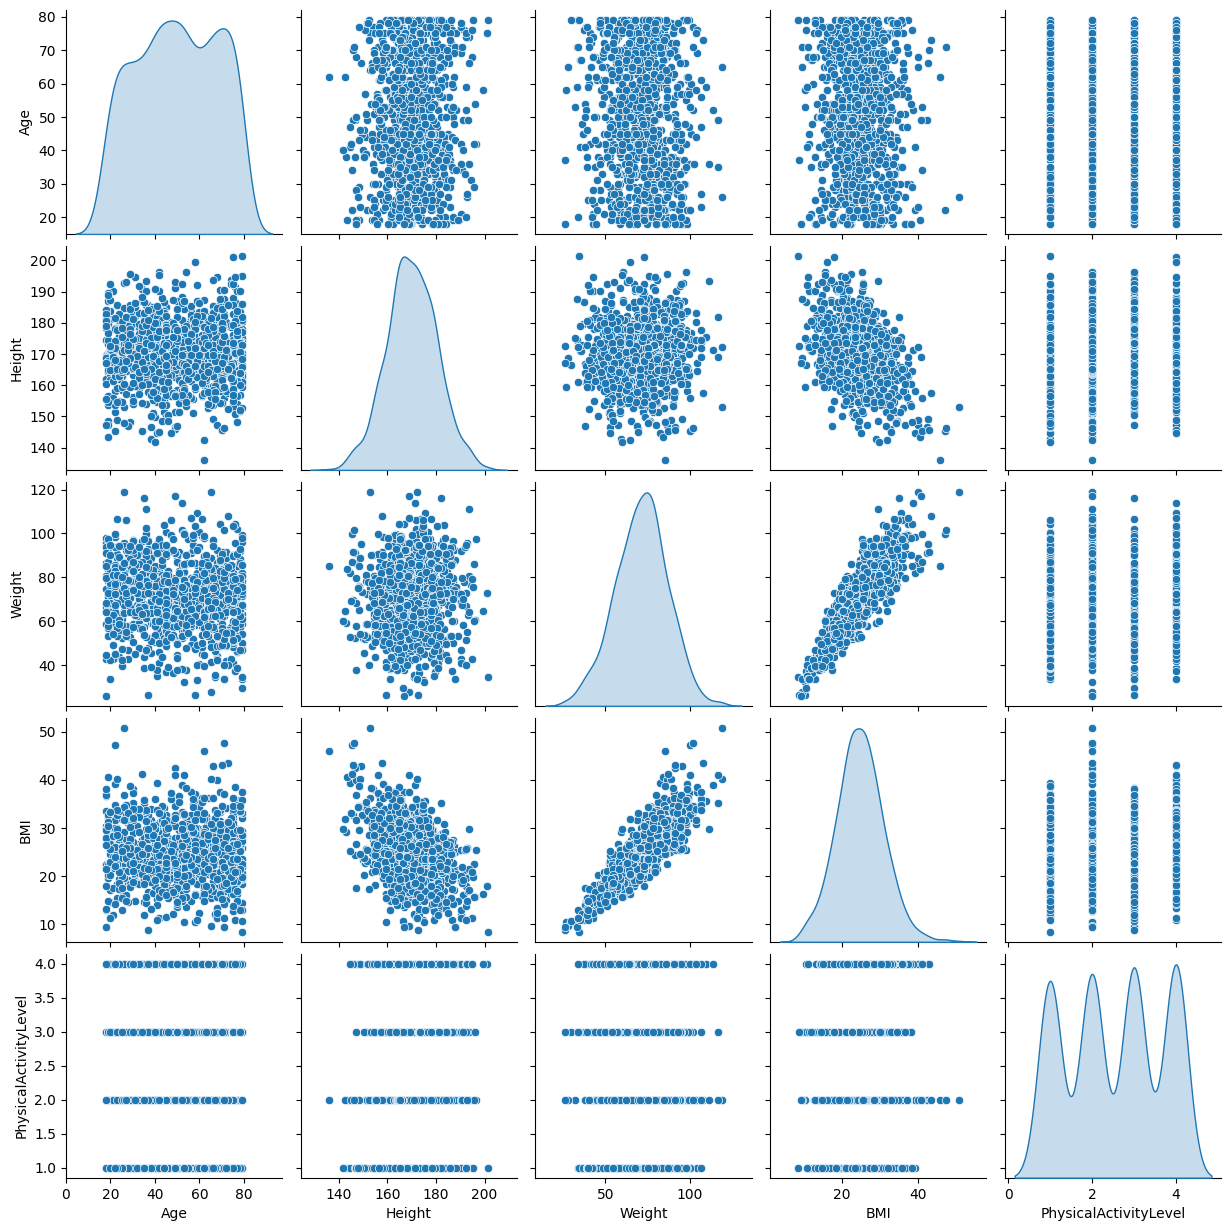

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

**Insight:** pairplot ini menunjukan hubungan antara fitur numerik dan juga kategorikal. terlihat bahwa fitur Weight dan BMI memiliki korelasi yg positif dibandingkan fiturf-fitur yg dimiliki lainnnya

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

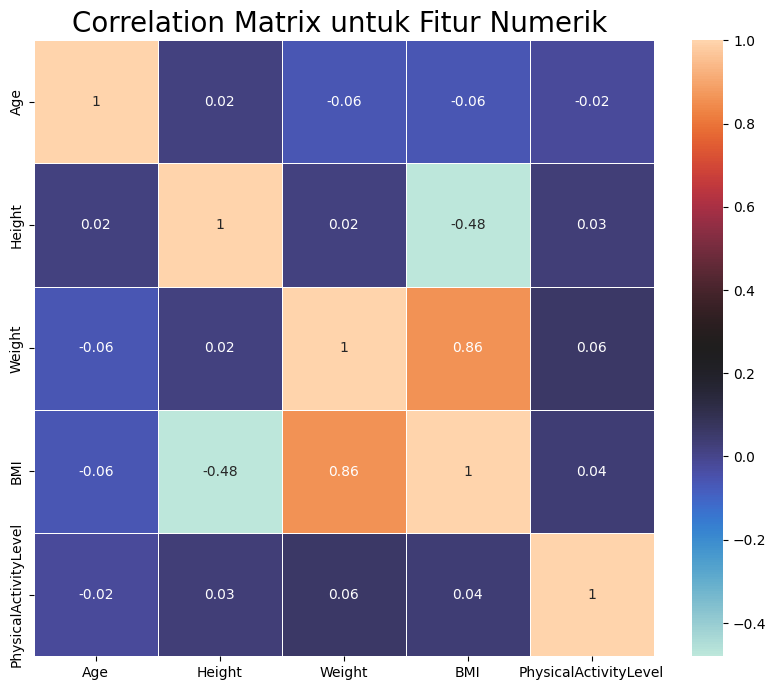

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='icefire', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)


**Insight:** Terdapat korelasi yang sangat kuat antara Weight dan BMI (0.86), yang menunjukkan bahwa semakin berat seseorang, semakin tinggi nilai BMI-nya. Sementara itu, PhysicalActivityLevel memiliki korelasi yang sangat lemah terhadap semua fitur numerik lainnya. Hal ini mengindikasikan bahwa tingkat aktivitas fisik kemungkinan tidak berkaitan langsung dengan berat badan

# **Data preparation**

In [ ]:
# Encoding Gender
le_gender = LabelEncoder()
df_clean['Gender'] = le_gender.fit_transform(df_clean['Gender'])

# Simpan mapping Gender
gender_mapping = dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))
print("Gender Mapping:", gender_mapping)

# Encoding ObesityCategory
le_obesity = LabelEncoder()
df_clean['ObesityCategory'] = le_obesity.fit_transform(df_clean['ObesityCategory'])

# Simpan mapping ObesityCategory
obesity_mapping = dict(zip(le_obesity.classes_, le_obesity.transform(le_obesity.classes_)))
print("ObesityCategory Mapping:", obesity_mapping)

# Lihat hasil akhir
df_clean.head()

Gender Mapping: {'Female': np.int64(0), 'Male': np.int64(1)}
ObesityCategory Mapping: {'Normal weight': np.int64(0), 'Obese': np.int64(1), 'Overweight': np.int64(2), 'Underweight': np.int64(3)}


,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,0
1,69,1,164.127306,89.959256,33.395209,2,1
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,0


In [ ]:
X = df_clean.drop('ObesityCategory', axis=1)
y = df_clean['ObesityCategory']

print(f'Jumlah shpae pada X: {X.shape}')
print(f'Jumlah shpae pada y: {y.shape}')

Jumlah shpae pada X: (972, 6)
Jumlah shpae pada y: (972,)


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Data Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 972
Total # of sample in train dataset: 777
Total # of sample in test dataset: 195


# **Modeling**

In [ ]:
# Latih model SVM (Support Vector Machine)

svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Prediksi dengan SVM
y_pred_svm = svm.predict(X_test)

# Evaluasi SVM
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=le_obesity.classes_))

SVM Test Accuracy: 0.9435897435897436

SVM Classification Report:
                precision    recall  f1-score   support

Normal weight       0.95      0.99      0.97        73
        Obese       0.97      0.86      0.91        35
   Overweight       0.90      0.95      0.92        56
  Underweight       1.00      0.94      0.97        31

     accuracy                           0.94       195
    macro avg       0.95      0.93      0.94       195
 weighted avg       0.95      0.94      0.94       195



**Insight:** Model SVM menunjukkan performa yang sangat baik dengan akurasi keseluruhan sebesar 94.35% pada data uji. Model mampu mengklasifikasikan keempat kategori berat badan dengan baik

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=le_obesity.classes_))

KNN Test Accuracy: 0.8717948717948718

KNN Classification Report:
                precision    recall  f1-score   support

Normal weight       0.83      0.97      0.89        73
        Obese       0.94      0.83      0.88        35
   Overweight       0.87      0.86      0.86        56
  Underweight       0.96      0.71      0.81        31

     accuracy                           0.87       195
    macro avg       0.90      0.84      0.86       195
 weighted avg       0.88      0.87      0.87       195



**Insight:** Model KNN menghasilkan akurasi sebesar 87.17% pada data uji, yang tergolong cukup baik namun masih berada di bawah performa model SVM 94.35%

# **Testing**

In [ ]:
# Fungsi untuk prediksi obesitas
def predict_obesity_category(new_data, scaler, svm, le_gender, le_obesity):
    new_data['Gender'] = le_gender.transform(new_data['Gender'])
    # Pilih fitur yang digunakan untuk prediksi (pastikan sesuai dengan data pelatihan)
    features = ['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']
    # Scaling data
    new_data_scaled = scaler.transform(new_data[features])
    # Prediksi dengan model SVM
    prediction_svm = svm.predict(new_data_scaled)
    # Decode hasil prediksi untuk label yang lebih mudah dibaca
    prediction_label = le_obesity.inverse_transform(prediction_svm)

In [ ]:
def predict_obesity_category_knn(new_data, scaler, knn, le_gender, le_obesity):
    new_data_encoded = new_data.copy()
    if isinstance(new_data_encoded.loc[0, 'Gender'], (int, float)):
        gender_encoded = new_data_encoded['Gender']
    else:
        try:
            gender_encoded = le_gender.transform(new_data_encoded['Gender'])
        except ValueError as e:
            raise ValueError(f"Terjadi error saat encoding Gender: {e}. Pastikan nilai Gender valid dan sudah termasuk saat LabelEncoder dilatih.")

    new_data_encoded['Gender'] = gender_encoded

    # Ambil hanya fitur yang dibutuhkan dan skalakan
    features = ['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']
    scaled_data = scaler.transform(new_data_encoded[features])

    # Prediksi
    y_pred_encoded = knn.predict(scaled_data)
    predicted_category = le_obesity.inverse_transform(y_pred_encoded)[0]

    return predicted_category


In [ ]:
# data baru
new_data = pd.DataFrame({
    'Age': [35],
    'Gender': ['Male'],
    'Height': [184],
    'Weight': [100],
    'BMI': [24.5],
    'PhysicalActivityLevel': [4]
})

In [ ]:
# Prediksi kategori obesitas untuk data baru
predicted_category = predict_obesity_category_knn(new_data, scaler, knn, le_gender, le_obesity)

# Tampilkan hasil prediksi
print(f'Prediksi dengan ObesityCategory menggunakan KNN: {predicted_category}')

Prediksi dengan ObesityCategory menggunakan KNN: Overweight


In [ ]:
# Prediksi kategori obesitas untuk data baru
predicted_category = predict_obesity_category(new_data, scaler, svm, le_gender, le_obesity)

# Tampilkan hasil prediksi kategori obesitas
print(f'Prediksi dengan ObesityCategory menggunakan SVM: {predicted_category}')

Prediksi dengan ObesityCategory menggunakan SVM: Overweight
